# **HR Analytics: Job Change of Data Scientists**

**Imagine if we could predict which Data Scientist is going to move to a new job!**

**Group 13 - Cambridge Analytica**

*Mohammad Yusuf*      22100289<br>
*Talha Nasir*       22100260<br>
*Muhammad Aaish Javed* 22100300<br>
*Sehroze Atir*       22100337

# Importing Libraries

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

blog link: https://nasirtalha086.medium.com/hr-analytics-job-change-of-data-scientists-556ed2ccaeb2


# **Initial Observation**

In [41]:
df_train = pd.read_csv('aug_train.csv')
print(df_train.head())
df_test = pd.read_csv('aug_test.csv')
print(df_test.head())

   enrollee_id      city  ...  training_hours target
0         8949  city_103  ...              36    1.0
1        29725   city_40  ...              47    0.0
2        11561   city_21  ...              83    0.0
3        33241  city_115  ...              52    1.0
4          666  city_162  ...               8    0.0

[5 rows x 14 columns]
   enrollee_id      city  ...  last_new_job training_hours
0        32403   city_41  ...             1             21
1         9858  city_103  ...             1             98
2        31806   city_21  ...         never             15
3        27385   city_13  ...             1             39
4        27724  city_103  ...            >4             72

[5 rows x 13 columns]


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [44]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [45]:
# We won't delete any whole columns since more than 75% of the data is available for each column
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [46]:
df_test.shape

(2129, 13)

In [47]:
df_train.shape

(19158, 14)

In [48]:
#Scanning for anomalies 

df_train["enrollee_id"].unique()
df_train["city"].unique()
df_train["city_development_index"].unique()
df_train["gender"].unique()
df_train["relevent_experience"].unique()
df_train["enrolled_university"].unique()
#df_train["enrolled_university"].mode()
#df_train["education_level"].unique()
#df_train["major_discipline"].unique()
#df_train["experience"].unique()
#df_train["company_size"].unique()
#df_train["company_type"].unique()
#df_train["last_new_job"].unique()
#df_train["training_hours"].unique()
#df_train["target"].unique()



array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [49]:
#Note: All columns with integer and float values do not have NULL values

# **Data Cleaning**

In [50]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

We have a total of 8 columns with missing data. 

The rows of 4 columns can be simply removed since there are very few nan values (enrolled_university, education_level, experience, last_new_job

In [51]:
df_train = df_train.dropna(axis=0, subset=['enrolled_university'])
df_train = df_train.dropna(axis=0, subset=['education_level'])
df_train = df_train.dropna(axis=0, subset=['experience'])
df_train = df_train.dropna(axis=0, subset=['last_new_job'])

df_test = df_test.dropna(axis=0, subset=['enrolled_university'])
df_test = df_test.dropna(axis=0, subset=['education_level'])
df_test = df_test.dropna(axis=0, subset=['experience'])
df_test = df_test.dropna(axis=0, subset=['last_new_job'])

df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    443
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline          249
experience                  0
company_size              577
company_type              579
last_new_job                0
training_hours              0
dtype: int64

In [52]:
#Some columns have categorical data in only a few columns. This needs adjustment as well
df_train["experience"].unique()

array(['>20', '15', '5', '11', '13', '7', '17', '2', '16', '1', '4', '10',
       '<1', '14', '18', '19', '12', '6', '9', '3', '8', '20'],
      dtype=object)

We will deal with the remaining columns and their null values individually

In [53]:
#dealing with the remaining missing values


#Replaced missing gender with undefined
df_train['gender'] = df_train['gender'].replace(np.nan, "Undefined")
df_test['gender'] = df_test['gender'].replace(np.nan, "Undefined")
df_train.gender.isna().sum()


#Replaced these with mode
df_train['major_discipline'] = df_train['major_discipline'].replace(np.nan, "STEM")
df_test['major_discipline'] = df_test['major_discipline'].replace(np.nan, "STEM")
df_train.major_discipline.isna().sum()

df_train['company_type'] = df_train['company_type'].replace(np.nan, 'Pvt Ltd')
df_test['company_type'] = df_test['company_type'].replace(np.nan, 'Pvt Ltd')
df_train.company_type.isna().sum()


#For the experience column, first we will convert it from categorical to numerical


df_train=df_train.rename(columns={'target': 'looking_for_job'})
df_test=df_test.rename(columns={'target': 'looking_for_job'})



df_train.experience.replace('>20',22,inplace=True)
df_test.experience.replace('>20',22,inplace=True)  

                               
df_train.experience.replace('<1',0,inplace=True)
df_test.experience.replace('<1',0,inplace=True)
df_train.experience=pd.to_numeric(df_train.experience)
df_test.experience=pd.to_numeric(df_train.experience)
experience_quantified=df_train[['experience','looking_for_job']]
#After this we will convert the column to three different classes
df_train.experience=np.where(df_train.experience >=10,'Highly-experienced', np.where(df_train.experience >=4,'Intermediate-experienced' ,'In-experienced/Low-experience'))
df_test.experience=np.where(df_test.experience >=10,'Highly-experienced', np.where(df_test.experience >=4,'Intermediate-experienced' ,'In-experienced/Low-experience'))
set(df_train.experience)

#For the relevent_experience column, we will convert the values to 1 and 0 to be used later for training
set(df_train.relevent_experience)
df_train.relevent_experience.replace(['Has relevent experience', 'No relevent experience'],[1,0],inplace=True)
df_test.relevent_experience.replace(['Has relevent experience', 'No relevent experience'],[1,0],inplace=True)
set(df_train.relevent_experience)


#Last new job column: since we have dropped the null values, we will now convert it to a numerical column
df_train.last_new_job.replace('>4','5',inplace=True)
df_test.last_new_job.replace('>4','5',inplace=True)
df_train.last_new_job.replace('never','0',inplace=True)
df_test.last_new_job.replace('never','0',inplace=True)
set(df_train.last_new_job) 
df_train.last_new_job=pd.to_numeric(df_train.last_new_job)
df_test.last_new_job=pd.to_numeric(df_train.last_new_job)
set(df_train.last_new_job)

company_size_quantified=df_train[['company_size','looking_for_job']]    #added later 2:45 am
#company_size column: following the same logic as experience column
df_train.company_size.replace('<10','Small',inplace=True)
df_test.company_size.replace('<10','Small',inplace=True)

df_train.company_size.replace('10/49','Small',inplace=True)
df_test.company_size.replace('10/49','Small',inplace=True)

df_train.company_size.replace('50-99','Small',inplace=True)
df_test.company_size.replace('50-99','Small',inplace=True)

df_train.company_size.replace('100-500','Small',inplace=True)
df_test.company_size.replace('100-500','Small',inplace=True)

df_train.company_size.replace('500-999','Medium',inplace=True)
df_test.company_size.replace('500-999','Medium',inplace=True)

df_train.company_size.replace('1000-4999',"Medium",inplace=True)
df_test.company_size.replace('1000-4999',"Medium",inplace=True)

df_train.company_size.replace('5000-9999','Large',inplace=True)
df_test.company_size.replace('5000-9999','Large',inplace=True)

df_train.company_size.replace('10000+','Large',inplace=True)
df_test.company_size.replace('10000+','Large',inplace=True)

df_train["company_size"]=df_train["company_size"].replace(np.nan, "undefined")
df_test["company_size"]=df_test["company_size"].replace(np.nan, "undefined")





In [54]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
looking_for_job           0
dtype: int64

In [55]:
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,looking_for_job
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Undefined,0,Full time course,Graduate,STEM,Intermediate-experienced,undefined,Pvt Ltd,0,83,0.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,Highly-experienced,Small,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Undefined,1,Part time course,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,0,no_enrollment,Graduate,Humanities,Highly-experienced,undefined,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,1,no_enrollment,High School,STEM,In-experienced/Low-experience,Medium,Pvt Ltd,2,97,0.0


# **Data Visualization**

In [56]:
import plotly.graph_objects as go
fig = go.Figure(
    data=go.Bar(x = ["Male","Female","Other","Undefined"],y=list(df_train.gender.value_counts())),
)
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Number of Employees",)
fig.update_layout(
    title={
        'text':"Gender of Employees",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [57]:
 company_types =dict(df_train.company_type.value_counts())
 company_types.keys()

dict_keys(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'])

In [58]:
import plotly.express as px

In [59]:

fig2 = go.Figure()
fig2.add_trace(go.Bar(y=df_train.company_type.value_counts(),
                      x = ['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'])
)
fig2.update_layout(
    xaxis_title="company_type",
    yaxis_title="Number of Employees",)
fig2.update_layout(
    title={
        'text':"Number of Employees by Company Type",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.show()

In [60]:
#since correlation matrix didn't give us much info on it so we  are using a box and whisker plot to understand the reation of city development index with target
fig = px.box(df_train, y="city_development_index",x= 'looking_for_job',title="Relation of City Development Index with Individuals Looking for a Job")
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [61]:

cor = df_train.corr()
# fig = ff.create_annotated_heatmap(x =list(df_train.corr().keys()),y =list(df_train.corr().keys()), z=cor,colorscale='Viridis')
# fig.show()

trace = plotly.graph_objs.Heatmap(x =list(df_train.corr().keys()),y =list(df_train.corr().keys()), z=cor)
data=[trace]
fig = plotly.graph_objs.FigureWidget(data=data)
fig.update_layout(
    title={
        'text': "Correlation Matrix",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.layout.height = 750
fig.layout.width =750
plotly.offline.iplot(fig)

#run again

In [62]:
df_train.corr().keys()

Index(['enrollee_id', 'city_development_index', 'relevent_experience',
       'last_new_job', 'training_hours', 'looking_for_job'],
      dtype='object')

In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(y=df_train.city.value_counts(),
                      x = list(df_train.city.value_counts().keys()))

)
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Number of Employees",)
fig.update_layout(
    title={
        'text':"Number of Employees in Each City",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()







In [64]:
# fig = px.box(df_train, y="relevent_experience",x= 'looking_for_job',title="Relation of relevent_experience with looking_for_job")
# fig.update_layout(
#     title={
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.show()
vals = df_train.city.value_counts().values[:5]
keys = dict(df_train.city.value_counts()[:5])
print(keys.keys(),vals)

dict_keys(['city_103', 'city_21', 'city_16', 'city_114', 'city_160']) [4194 2454 1471 1254  817]


In [65]:
#56 percent of data is collected from  these 5 cities
data = vals.sum()/ df_train.city.value_counts().sum()
data*100

56.567114466526036

# Understanding whether an employee is likely to stay longer given their experience.

In [66]:
df_train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,looking_for_job
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,5,47,0.0


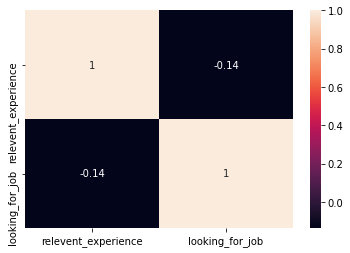

In [67]:
new_df= df_train[["relevent_experience","looking_for_job"]]
corrMatrix=new_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [68]:
#during the cleaning process we saved the quantified value of experience to compare it to people looking for new job 

experience_quantified.head()

,experience,looking_for_job
0,22,1.0
1,15,0.0
2,5,0.0
4,22,0.0
5,11,1.0


In [69]:
import plotly.graph_objects as go
fig = go.Figure(
    data=go.Bar(x = ["Highly-Experienced","Intermediate-Experienced","In-Experienced/Low-Experience"],y=list(df_train.experience.value_counts())),
)
fig.update_layout(
    xaxis_title="Experience",
    yaxis_title="Number of Employees",)
fig.update_layout(
    title={
        'text':"Distribution of Experience",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [70]:
import pandas

#Highly_experienced_new_job 
num_high = (df_train[ (df_train.experience == "Highly-experienced") & (df_train.looking_for_job == 1) ].shape[0])*100/df_train[ (df_train.experience == "Highly-experienced")].shape[0]
num_inter= df_train[ (df_train.experience == "Intermediate-experienced") & (df_train.looking_for_job == 1) ].shape[0]*100/df_train[ (df_train.experience == "Intermediate-experienced")].shape[0]
num_low = df_train[ (df_train.experience == "In-experienced/Low-experience") & (df_train.looking_for_job == 1) ].shape[0]*100/df_train[ (df_train.experience == "In-experienced/Low-experience")].shape[0]





data = {'Highly-Experienced': num_high, 'Intermediate-Experienced': num_inter, 'In-Experienced/Low-Experience': num_low}

fig3 = go.Figure(
    data = go.Bar(x = ['Highly-Experienced', 'Intermediate-Experienced', 'In-Experienced/Low-Experience'], y = [num_high,num_inter,num_low], )
)
fig3.update_layout(
    xaxis_title="Experience",
    yaxis_title="Number of Employees",
)
fig3.update_layout(
    title={
        'text':"Distribution of Experience of Employees Looking For New Job",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        }
)
fig3.show()
#plt.bar(range(len(data)), df.values,color='purple')
#plt.xticks(range(len(data)), df.index.values)
#plt.title('Impact of Experience on choice of looking new job')
#f = plt.figure()
#f.set_figwidth(10)
#f.set_figheight(10)
#plt.show()
#plt.show()


In [71]:
experience_quantified["experience"].value_counts()


num_0 = experience_quantified[ (experience_quantified.experience == 0) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 0)].shape[0]
num_1 = experience_quantified[ (experience_quantified.experience == 1) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 1)].shape[0]
num_2 = experience_quantified[ (experience_quantified.experience == 2) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 2)].shape[0]
num_3 = experience_quantified[ (experience_quantified.experience == 3) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 3)].shape[0]
num_4 = experience_quantified[ (experience_quantified.experience == 4) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 4)].shape[0]
num_5 = experience_quantified[ (experience_quantified.experience == 5) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 5)].shape[0]
num_6 = experience_quantified[ (experience_quantified.experience == 6) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 6)].shape[0]
num_7 = experience_quantified[ (experience_quantified.experience == 7) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 7)].shape[0]
num_8 = experience_quantified[ (experience_quantified.experience == 8) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 8)].shape[0]
num_9 = experience_quantified[ (experience_quantified.experience == 9) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 9)].shape[0]
num_10 = experience_quantified[ (experience_quantified.experience == 10) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 10)].shape[0]
num_11 = experience_quantified[ (experience_quantified.experience == 11) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 11)].shape[0]
num_12 = experience_quantified[ (experience_quantified.experience == 12) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 12)].shape[0]
num_13 = experience_quantified[ (experience_quantified.experience == 13) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 13)].shape[0]
num_14 = experience_quantified[ (experience_quantified.experience == 14) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 14)].shape[0]
num_15 = experience_quantified[ (experience_quantified.experience == 15) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 15)].shape[0]
num_16 = experience_quantified[ (experience_quantified.experience == 16) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 16)].shape[0]
num_17 = experience_quantified[ (experience_quantified.experience == 17) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 17)].shape[0]
num_18 = experience_quantified[ (experience_quantified.experience == 18) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 18)].shape[0]
num_19 = experience_quantified[ (experience_quantified.experience == 19) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 19)].shape[0]
num_20 = experience_quantified[ (experience_quantified.experience == 20) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 20)].shape[0]
num_21 = experience_quantified[ (experience_quantified.experience == 22) & (experience_quantified.looking_for_job == 1) ].shape[0]*100/experience_quantified[ (experience_quantified.experience == 22)].shape[0]

#print(num_low)

data = {'0': num_0, '1': num_1, '2': num_2,'3':num_3,'4':num_4,'5':num_5,'6':num_6,'7':num_7,'8':num_8,'9':num_9,'10':num_10,'11':num_11,'12':num_12,'13':num_13,'14':num_14,'15':num_15,'16':num_16,'17':num_17,'18':num_18,'19':num_19,'20':num_20,'21':num_21}
df = pd.Series(data)

fig4 = go.Figure(
    data = go.Bar(x = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'], y = [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9, num_10, num_11, num_12, num_13, num_14, num_15, num_16, num_17, num_18, num_19, num_20, num_21], )
)
fig4.update_layout(
    xaxis_title="Experience Quantified (no. of years)",
    yaxis_title="Number of Employees",
)
fig4.update_layout(
    title={
        'text':"Distribution of Quantified Experience of Employees Looking For New Job",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        }
)
fig4.show()
#plt.bar(range(len(data)), df.values,color='blue',)
#plt.xticks(range(len(df)), df.index.values)
#plt.show()

As we can clearly see here, when experience increases, the probability for the candidate to look for a new job decreases. we suspect that the reason for this is that older candidates tend to be more content with their jobs and are looking to settle down

# What are the factors that cause an individual to leave a particular company?

In [72]:
df_train.head()


#kde for size

#pie chart for type


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,looking_for_job
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,Highly-experienced,Small,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Undefined,0,Full time course,Graduate,STEM,Intermediate-experienced,undefined,Pvt Ltd,0,83,0.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,Highly-experienced,Small,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Undefined,1,Part time course,Graduate,STEM,Highly-experienced,undefined,Pvt Ltd,1,24,1.0


As we can see, in relation to companies, the information we have is regarding the company size and company type. So we will now see the relationship between these factors and individuals leaving their job

0.2573740886897197 0.14153846153846153 0.2206405693950178 0.2149122807017544 0.176 0.23684210526315788


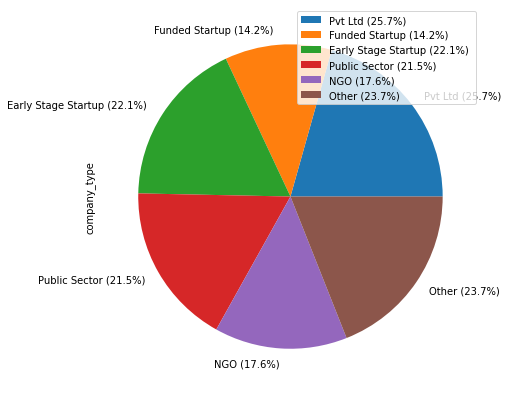

In [73]:
#HEADING FOR PIE CHART= Comparisions of percentages of individuals who want to leave their companies





df=df_train[["company_type","looking_for_job"]]


Pvt_ltd=(df[(df.company_type=="Pvt Ltd") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="Pvt Ltd")].shape[0]
Funded_Startup=(df[(df.company_type=="Funded Startup") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="Funded Startup")].shape[0]
Early_Stage_Startup=(df[(df.company_type=="Early Stage Startup") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="Early Stage Startup")].shape[0]
Public_Sector=(df[(df.company_type=="Public Sector") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="Public Sector")].shape[0]
NGO=(df[(df.company_type=="NGO") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="NGO")].shape[0]
Other=(df[(df.company_type=="Other") & ((df.looking_for_job==1))].shape[0])/df[(df.company_type=="Other")].shape[0]


df = pd.DataFrame({'company_type': [Pvt_ltd,Funded_Startup, Early_Stage_Startup,Public_Sector,NGO,Other],
                   'radius': [0, 0, 0,0,0,0]},
                  index=['Pvt Ltd (25.7%)', 'Funded Startup (14.2%) ', 'Early Stage Startup (22.1%) ','Public Sector (21.5%)','NGO (17.6%)','Other (23.7%)'])
plot = df.plot.pie(y='company_type', figsize=(7, 7))

print(Pvt_ltd,Funded_Startup, Early_Stage_Startup,Public_Sector,NGO,Other)

As we can see here, Pvt Ltd companies have the highest job satisfaction where as Funded Startups have the lowest job satisfaction

In [74]:
#KDE





company_size_quantified.company_size.replace('<10',5,inplace=True)
company_size_quantified.company_size.replace('10/49',25,inplace=True)
company_size_quantified.company_size.replace('50-99',75,inplace=True)
company_size_quantified.company_size.replace('100-500',250,inplace=True)
company_size_quantified.company_size.replace('500-999',750,inplace=True)
company_size_quantified.company_size.replace('1000-4999',2500,inplace=True)
company_size_quantified.company_size.replace('5000-9999',7500,inplace=True)
company_size_quantified.company_size.replace('10000+',15000,inplace=True)
company_size_quantified = company_size_quantified.dropna(axis=0, subset=['company_size'])

company_size_quantified

'''
df = pd.DataFrame({
    company_size_quantified[(company_size_quantified.company_size==5)],
    company_size_quantified[(company_size_quantified.company_size==25)],
})
ax = df.plot.kde()
'''

#company_size_quantified[(company_size_quantified.company_size==5)]
company_size_quantified


five=(company_size_quantified[(company_size_quantified.company_size==5) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==5)].shape[0]
twenty_five=(company_size_quantified[(company_size_quantified.company_size==25) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==25)].shape[0]
seventy_five=(company_size_quantified[(company_size_quantified.company_size==75) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==75)].shape[0]
two_fifty=(company_size_quantified[(company_size_quantified.company_size==250) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==250)].shape[0]
sv_fifty=(company_size_quantified[(company_size_quantified.company_size==750) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==750)].shape[0]
twfive_100=(company_size_quantified[(company_size_quantified.company_size==2500) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==2500)].shape[0]
svfive_100=(company_size_quantified[(company_size_quantified.company_size==7500) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==7500)].shape[0]
fifteen_100=(company_size_quantified[(company_size_quantified.company_size==15000) & ((company_size_quantified.looking_for_job==1))].shape[0])*100/company_size_quantified[(company_size_quantified.company_size==15000)].shape[0]



#data = {'5': five, '25': twenty_five, '75': seventy_five,'250':two_fifty ,'750':sv_fifty,'2500':twfive_100,'7500':svfive_100,'15000':fifteen_100}
df = pd.Series(data)

fig6 = go.Figure(
    data = go.Bar(x = ["(5)", "(25)", "(75)", "(250)", "(750)", "(2500)", "(7500)", "(15000)"], 
                  y = [five, twenty_five, seventy_five, two_fifty, sv_fifty, twfive_100, svfive_100, fifteen_100], 
                  )
)
fig6.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Percentage of Employees Willing to Leave",
)
fig6.update_layout(
    title={
        'text':"Percentage of People Willing to Quit Their Jobs in Companies of Various Sizes",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        }
)
fig6.show()



#plt.bar(range(len(data)), df.values,color='blue')
#plt.xticks(range(len(data)), df.index.values)
#plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 As we can see there is no apparent trend between company size and percentage of people (in the particular size of company) who want to leave that company


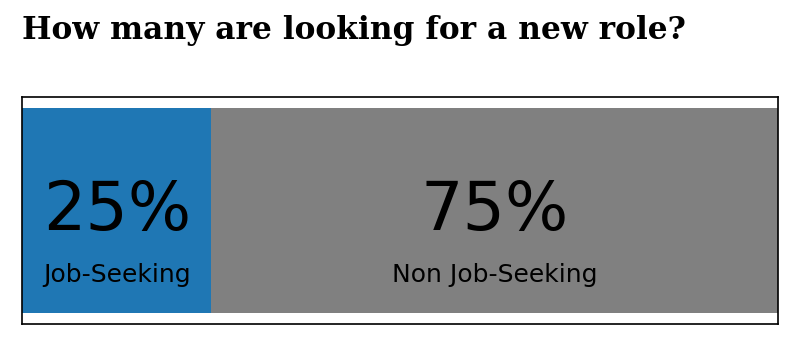

In [75]:
x=df_train.groupby(['looking_for_job'])['looking_for_job'].count()
y=len(df_train)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)


ax.barh(ratio.index, ratio[1], label='Job-Seeking')
ax.barh(ratio.index, ratio[0], left=ratio[1.0], color='gray', label='Non Job-Seeking')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i), va = 'center', ha='center',fontsize=32)
    ax.annotate("Job-Seeking", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12)
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32)
    ax.annotate("Non Job-Seeking", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12)

fig.text(0.125,1.075,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
 


plt.show()    

# We see an imbalanced dataset, most people are not job-seeking

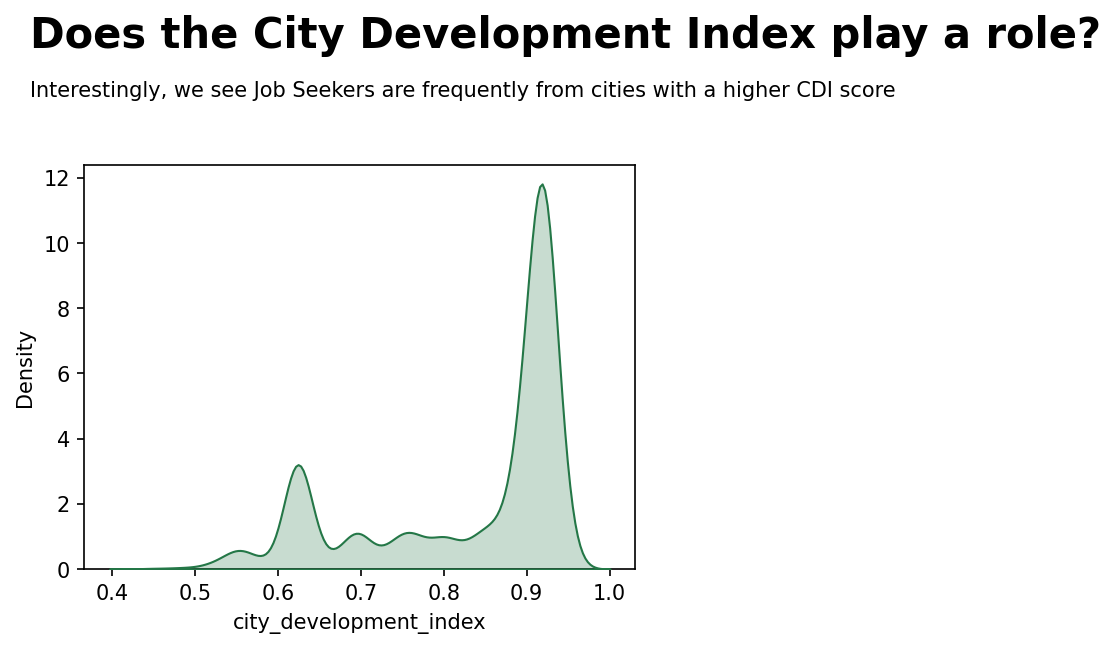

In [76]:
fig = plt.figure(figsize=(18,15), dpi=150)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax2 = fig.add_subplot(gs[1, 0])


# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold')
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a higher CDI score', fontsize=10)
sns.kdeplot(df_train["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



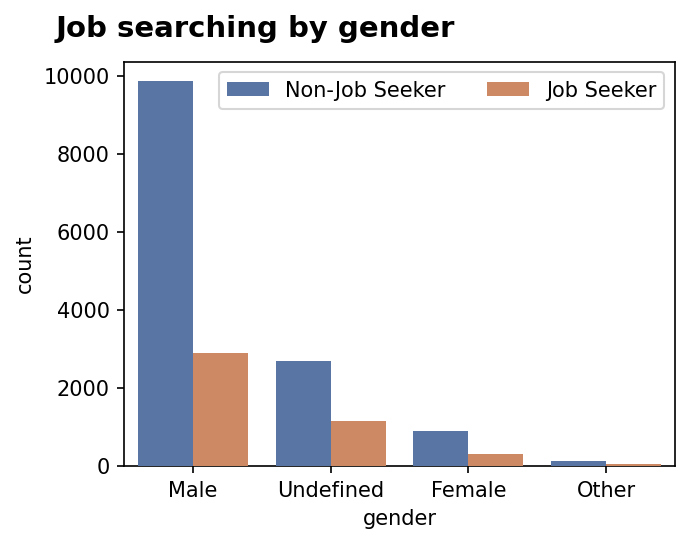

In [77]:
fig = plt.figure(figsize=(18,15), dpi=150)
ax1 = fig.add_subplot(gs[0, 1])


# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold')
sns.countplot(x="gender", hue="looking_for_job", data=df_train, palette=sns.color_palette(palette='deep'), ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2)

# Machine Learning 


In [78]:
one_hot = pd.get_dummies(df_train[['enrolled_university','gender'
                    ,'company_type','company_size','experience',
                    'major_discipline','education_level']])

df_train.drop(['enrolled_university','gender','company_type',
               'company_size','experience','major_discipline',
               'education_level'],axis=1, inplace=True)


In [79]:
data = pd.concat([df_train, one_hot],axis=1)

In [80]:

def ordinal_encode(df):
    city = {
    'city':list(set(df['city']))}
    
    for i in city:
        unique = list(df[i].unique())
        df[i] = df[i].apply(lambda x: city[i].index(x))
    return df
ordinal_encode(data)


,enrollee_id,city,city_development_index,relevent_experience,last_new_job,training_hours,looking_for_job,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,gender_Female,gender_Male,gender_Other,gender_Undefined,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_size_Large,company_size_Medium,company_size_Small,company_size_undefined,experience_Highly-experienced,experience_In-experienced/Low-experience,experience_Intermediate-experienced,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,8949,33,0.920,1,1,36,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,29725,94,0.776,0,5,47,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,11561,14,0.624,0,0,83,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,666,63,0.767,1,4,8,0.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
5,21651,37,0.764,1,1,24,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,114,0.878,0,1,42,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
19154,31398,33,0.920,1,4,52,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
19155,24576,33,0.920,1,4,44,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
19156,5756,108,0.802,1,2,97,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [81]:
X= data.drop(['looking_for_job'],axis=1)

y= data['looking_for_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
y_test.value_counts()

0.0    3381
1.0    1123
Name: looking_for_job, dtype: int64

([<matplotlib.axis.XTick at 0x7f4c567af1d0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

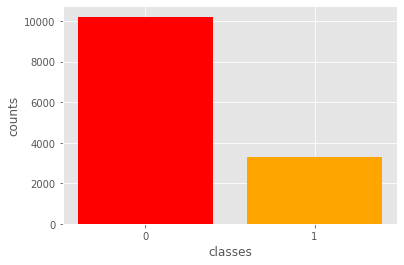

In [83]:
keys= list(y_train.value_counts().keys())
vals= list(y_train.value_counts().values)
plt.style.use('ggplot')
plt.bar(keys,vals,color =['r','orange'])
plt.xlabel("classes")
plt.ylabel('counts')
plt.xticks(keys,["0","1"])

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train_sm)
y_train = pd.Series(y_train_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



([<matplotlib.axis.XTick at 0x7f4c5323aa10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

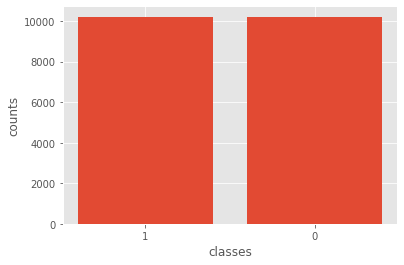

In [85]:
keys= list(y_train.value_counts().keys())
vals= list(y_train.value_counts().values)
plt.style.use('ggplot')
plt.bar(keys,vals)
plt.xlabel("classes")
plt.ylabel('counts')
plt.xticks(keys,["0","1"])

In [86]:
def test_eval(clf_model, X_test, y_test,):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test,cmap = 'YlOrBr')
    plt.grid(False)  
    plt.show() 

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          

## Logistic Regression

Confusion Matrix


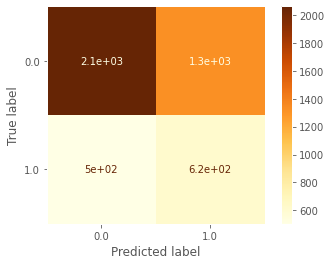

Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69      3381
         1.0       0.32      0.55      0.40      1123

    accuracy                           0.60      4504
   macro avg       0.56      0.58      0.55      4504
weighted avg       0.68      0.60      0.62      4504
 

AUC-ROC
0.6157933536185003


In [87]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(X_test)
test_eval(clf,X_test, y_test)

In [88]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00003
Feature: 1, Score: -0.01250
Feature: 2, Score: -0.00010
Feature: 3, Score: -0.00014
Feature: 4, Score: -0.00032
Feature: 5, Score: -0.00071
Feature: 6, Score: 0.00016
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00015
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00008
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00008
Feature: 13, Score: -0.00001
Feature: 14, Score: -0.00004
Feature: 15, Score: -0.00001
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00007
Feature: 19, Score: -0.00005
Feature: 20, Score: -0.00006
Feature: 21, Score: -0.00020
Feature: 22, Score: 0.00031
Feature: 23, Score: -0.00019
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00007
Feature: 26, Score: -0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00011
Feature: 33, Score: -0.00003
Feature: 34, Score: -0.00005
Feature: 

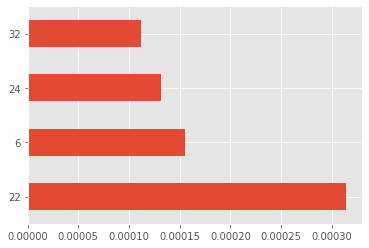

In [89]:
feat_importances = pd.Series(importance, index=list(X_train.columns))
feat_importances.nlargest(4).plot(kind='barh')
#most important features(top 4)

## Random forest Classifier
uses grid search to find optimal parameters for the model

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20,30,40,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
import pprint
pprint.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 200, 300, 400, 500]}


In [91]:
#choosing the right parmeters for the model using RandomizedSearchCV
rf_model = RandomForestClassifier()
clf_RF = RandomizedSearchCV(rf_model, random_grid,cv = 3,
                            verbose=2, random_state=42, n_jobs = -1)
clf_RF.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Confusion Matrix


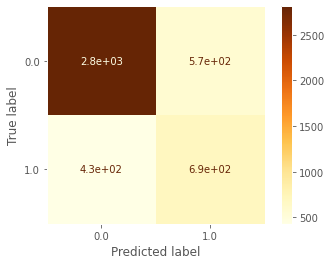

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      3381
         1.0       0.55      0.62      0.58      1123

    accuracy                           0.78      4504
   macro avg       0.71      0.72      0.71      4504
weighted avg       0.79      0.78      0.78      4504
 

AUC-ROC
0.7878017984846964


In [92]:
test_eval(clf_RF, X_test, y_test)

## Gradient Boost Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': [2,6,8,10,12,15],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,2,4]
}
#choosing the right parmeters for the model using RandomizedSearchCV
clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=5, scoring='roc_auc',n_jobs=1)

clf_gb.fit(X_train, y_train)
clf_gb.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Confusion Matrix


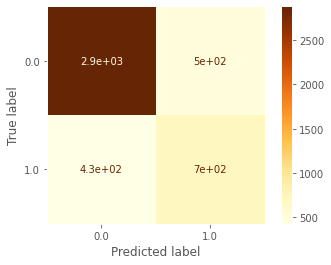

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      3381
         1.0       0.58      0.62      0.60      1123

    accuracy                           0.79      4504
   macro avg       0.73      0.74      0.73      4504
weighted avg       0.80      0.79      0.80      4504
 

AUC-ROC
0.7993608144407635


In [98]:
#we were able to get the highest accuracy and AUC-ROC score with gradient boost classifier
test_eval(clf_gb, X_test, y_test)

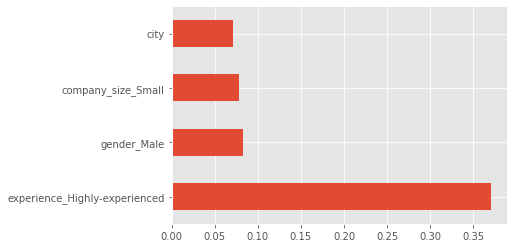

In [95]:
def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = X_train.columns
    imp = pd.DataFrame({'Features': list(X_test), 'Importance': importances})
    
    imp['Importance'].nlargest(4).plot(kind='barh')
    li = list(imp['Importance'].nlargest(4))
    lis = list(imp['Importance'].nlargest(4).index)
    fs =list(X_test.columns)
    labels =[fs[i] for i in lis]
    plt.yticks(range(4), [fs[i] for i in lis])

Featureimportances(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0))

#             _*That's all folks*_
